![pAIthon Labs Logo](https://raw.githubusercontent.com/worldfamous718/pAIthon-Labs/main/Labs/Logos-Files/Lab-Logo.png)

# Conclusion of CSC 221

## Reflection on Learning Progress

I am more than happy with what I have learned and the mindset for coding that I have developed. This project tested every bit of my patience, but my determination was the overall winner.

## Project Overview

For this project, I combined my basic knowledge of Python to develop a spoof. This spoof may just trick you into thinking the book you are buying is really something it isn't.

## Technical Details

- Used a variety of different libraries and modules
- Demonstrated the versatility of Python as a programming language
- Learned new concepts and techniques along the way

## Challenges Encountered

Welcome to the life of a developer!

Some previously known methods weren't working as expected. This led to further learning and problem-solving.

## Project Status

While it's not perfect yet, I'm proud of what I was able to figure out and make work. There's still room for improvement, and I still have some time to continue refining it.

## Next Steps

I'll continue working on optimizing and enhancing the project over the next 2 weeks.


In [240]:
# World..redacted
# CSC 221 Final Project
# Web Scraping and Data Visualization
# 11/21/2024

# IMPORT LIBRARIES AND MODULES FOR MY PROJECT:

import requests
from bs4 import BeautifulSoup
import csv
import time
import re
import random
from datetime import datetime, timedelta


In [241]:
# ADD TIME DELAY BETWEEN FET REQUESTS TO AVOID ERRORS:

time.sleep(2)  # Wait for 2 seconds between requests

# THIS IS THE SITE I WILL BE SCRAPING
BASE_URL = "https://nostarch.com/"


# Building Our Web Scraper

Before we dive into the code, let's take a moment to appreciate the power of web scraping!


![BeautifulSoup](Python-BeautifulSoup.png)
![BeatifulSoulLogo](beautiful-soup.png)

In this project, we're going to build a web scraper to extract information about Python books from the No Starch Press website. We'll use the BeautifulSoup library to parse the HTML content and extract the relevant data.

Our scraper will:
- Scrape book titles, authors, and URLs
- Generate fictional page counts and publication dates where real data isn't available
- Save the extracted information to a CSV file
- Display the first 10 results in the console

This project showcases several key aspects of web scraping:
- Using HTTP requests to fetch webpage content
- Parsing HTML with BeautifulSoup
- Handling dynamic content and missing data
- Structuring and saving extracted information




In [243]:
# BUILD WEB SCRAPER:

def scrape_book_page(url):
    full_url = f"{BASE_URL}/{url}"
    response = requests.get(full_url)
    soup = BeautifulSoup(response.content, 'html.parser')

    books = []

    # I'M USING A REGULAR EXPRESSION HERE SO I CAN BROADEN MY SEARCH. IT WAS HARD TO FIND WHAT I WAS LOOKING FOR:
    
    book_elements = soup.find_all(['article', 'div'], class_=re.compile(r'node|product|teaser|clearfix'))

    for element in book_elements:
        h2_element = element.find('h2')
        if h2_element and h2_element.a:
            title = h2_element.a.text.strip()
            url = BASE_URL + h2_element.a['href']

            author_element = element.find('div', class_=re.compile(r'field-name-field-author|author'))
            if author_element:
                author_text = author_element.find('div', class_='field-items').find('div', class_='field-item even')
                if author_text and author_text.text.strip():
                    author = author_text.text.strip()

            # ADD ITEMS TO MY BOOK LIST:
            
            books.append({
                'Title': title,
                'URL': url,
                'Author': author if author else '',
                'Number of Pages': '',
                'Release Date': ''
            })

    return books

In [244]:
# THIS IS WHY I WILL BE A DEVELOPER. ITS MY WORK AROUND FUNCTION TO FORCE ELEMENTS THAT I COULDNT GET TO SCRAPE
# I AM USING RANDOM TO GENERATE INFO REGARDLESS IF THE SCRAPER MISSES SOMETHING. IT WAS MISSING PAGE  NUMBERS AND DATES:

def scrape_book_details(books):
    start_date = datetime(1999, 4, 1)
    end_date = datetime(2024, 7, 2)

    for book in books:
        num_pages = str(random.randint(216, 855))
        random_date = start_date + timedelta(
            seconds=random.randint(0, int((end_date - start_date).total_seconds())),
        )
        release_date = random_date.strftime('%B %Y')

        book['Number of Pages'] = f"{num_pages} pp."
        book['Release Date'] = release_date

    return books


In [245]:
# THIS IS HOW IM FORMATTING MY CSV FILE OUTPUT WITH ALL THE COLUMS I SCRAPED:

def save_to_csv(books):
    fieldnames = ['Title', 'Author', 'Number of Pages', 'Release Date', 'URL']
    with open('python_books.csv', 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for index, book in enumerate(books, 1):
            writer.writerow({
                'Title': book.get('Title'),
                'Author': book.get('Author', ''),
                'Number of Pages': book.get('Number of Pages', '').strip(),
                'Release Date': book.get('Release Date', '').strip(),
                'URL': book.get('URL')
            })


In [246]:
# PANDAS DIDNT LIKE MY CUSTOM WORKAROUND SO IT WAS GIVING ME ISSUES, THIS IS THE BEST I CAN COME UP WITH FOR OUTPUT:

def display_first_10_results(books):
    for index, book in enumerate(books[:10], 1):
        print(f"\nBook {index}:")
        print(f"Title: {book.get('Title', '')}")
        print(f"Author: {book.get('Author', 'N')}")
        print(f"Number of Pages: {book.get('Number of Pages', '')}")
        print(f"Release Date: {book.get('Release Date', '')}")
        print(f"URL: {book.get('URL')}")


In [247]:
# THIS IS HOW SOMEONE WHO SAYS THEY WANT TO BE A DEVELOPER DEFINES A PROPER MAIN FUNCTION
# AND TO THINK IN CSC 121 I DIDNT EVEN UNDERSTAND THE PURPOSE OF MAIN, LOL:

def main():
    url = "catalog/python"
    books = scrape_book_page(url)
    books = scrape_book_details(books)

    save_to_csv(books)

    print("Scraping complete! Your spoofed .csv is ready!")
    print('Here is a sample of your first 10 results:')
    # Print only the first 10 results
    #print("\nFirst 10 Results:")
    display_first_10_results(books)


if __name__ == "__main__":
    try:
        main()
    except Exception as e:
        print(f"An error occurred: {str(e)}")


Scraping complete! Your spoofed .csv is ready!
Here is a sample of your first 10 results:

Book 1:
Title: Python for Excel Power Users
Author: Tracy Stephens
Number of Pages: 332 pp.
Release Date: July 2011
URL: https://nostarch.com//python-excel

Book 2:
Title: Automate the Boring Stuff with Python, 3rd Edition
Author: Al Sweigart
Number of Pages: 636 pp.
Release Date: October 2023
URL: https://nostarch.com//automate-boring-stuff-python-3rd-edition

Book 3:
Title: Python Playground, 2nd Edition
Author: Mahesh Venkitachalam
Number of Pages: 843 pp.
Release Date: March 2001
URL: https://nostarch.com//python-playground-2nd-edition

Book 4:
Title: Python for Kids, 2nd Edition
Author: Jason R. Briggs
Number of Pages: 523 pp.
Release Date: March 2007
URL: https://nostarch.com//python-kids-2nd-edition

Book 5:
Title: Dive Into Data Science
Author: Bradford Tuckfield
Number of Pages: 855 pp.
Release Date: November 2018
URL: https://nostarch.com//dive-data-science

Book 6:
Title: Python Crash 

# CSV Sample Output
![CSV Sample Output](CSV-Output-Sample.png)

### Notice the diffence?!

# Python Books Catalog

![Python Books Catalog](Python-by-No-Starch-Press.jpg)

This catalog contains information about popular Python books available at No Starch Press.

The data was scraped from their website using web scraping techniques and Python libraries such as `requests` and `BeautifulSoup`. 

Key features of this project:
- Scrapes book titles, authors, page counts, and publication dates
- Generates random page counts and dates when specific information wasn't available
- Saves the data to a CSV file named `spoofed.csv`
- Displays the first 10 results in tms of service.


![Pandas](Pandas.png)

# Data Visualization with Pandas

## Step 1: Importing and Creating a DataFrame

Now that we have successfully created a web scraper that generates a spoofed CSV file every time our program runs, it's time to work on the data visualization part of the code.

For the first step, we'll import the spoofed CSV file and use the Pandas library along with its DataFrame and Series functions to create a data frame. A data frame is a structure constructed with rows and columns, similar to the CSV we used, but with more functionality for data visualization.

Let's get started!

### Code Example



In [250]:
import pandas as pd
from pandas import DataFrame, Series
import os

In [251]:
cols = [ 'Title', 'Author','Number of Pages', 'Release Date', 'URL' ]
DF_PYTHON_BOOKS = pd.read_csv('python_books.csv', names=cols)
DF_PYTHON_BOOKS.head(11)

,Title,Author,Number of Pages,Release Date,URL
0,Title,Author,Number of Pages,Release Date,URL
1,Python for Excel Power Users,Tracy Stephens,332 pp.,July 2011,https://nostarch.com//python-excel
2,"Automate the Boring Stuff with Python, 3rd Edi...",Al Sweigart,636 pp.,October 2023,https://nostarch.com//automate-boring-stuff-py...
3,"Python Playground, 2nd Edition",Mahesh Venkitachalam,843 pp.,March 2001,https://nostarch.com//python-playground-2nd-ed...
4,"Python for Kids, 2nd Edition",Jason R. Briggs,523 pp.,March 2007,https://nostarch.com//python-kids-2nd-edition
5,Dive Into Data Science,Bradford Tuckfield,855 pp.,November 2018,https://nostarch.com//dive-data-science
6,"Python Crash Course, 3rd Edition",Eric Matthes,852 pp.,July 2006,https://nostarch.com//python-crash-course-3rd-...
7,Python Tools for Scientists,Lee Vaughan,342 pp.,October 2018,https://nostarch.com//python-tools-scientists
8,The Art of Clean Code,Christian Mayer,539 pp.,December 2014,https://nostarch.com//art-clean-code
9,Python for Data Science,Yuli Vasiliev,430 pp.,October 2008,https://nostarch.com//python-data-science


![Matplotlib](matplotlib.png)

# Data Visualization with Matplotlib

## Introduction

The key to effective data visualization is conveying information in a format that is much easier to interpret, especially for non-technical audiences. Matplotlib is a powerful tool for data visualization in Python.

## About Matplotlib

Matplotlib is a multi-platform data visualization library built on NumPy arrays and designed to work with the broader SciPy stack. One of its most important features is its ability to play well with many operating systems and graphics backends.

## Application to Programming Language Learning

With the data we scraped from the No Starch Press site, we can graphically demonstrate various aspects of programming language learning. Let's consider the case of learning Python!

Are you looking to:

1. Learn a new programming language (PYTHON!)
2. Find a book that's easy to get into and complete in a weekend (around 200 pages)?
3. Dive deep into a comprehensive 700-page reference manual for in-depth Python knowledge over several months?

## Creating a Visualization

Let's use Matplotlib to create a visualization that can help with this decision-making process. First, we need to write some code...

![Python Graph](1000008347.png)



In [253]:
import pandas as pd
import matplotlib.pyplot as plt



#import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors
#import matplotlib.patches as patches

In [254]:
# Order the DataFrame by Number of Pages
DF_PYTHON_BOOKS = DF_PYTHON_BOOKS.sort_values('Number of Pages')


In [255]:
# Define colors for authors
author_colors = {}
color_counter = 0
for _, row in DF_PYTHON_BOOKS.iterrows():
    if row['Author'] not in author_colors:
        author_colors[row['Author']] = plt.cm.tab10(color_counter % 10)
        color_counter += 1


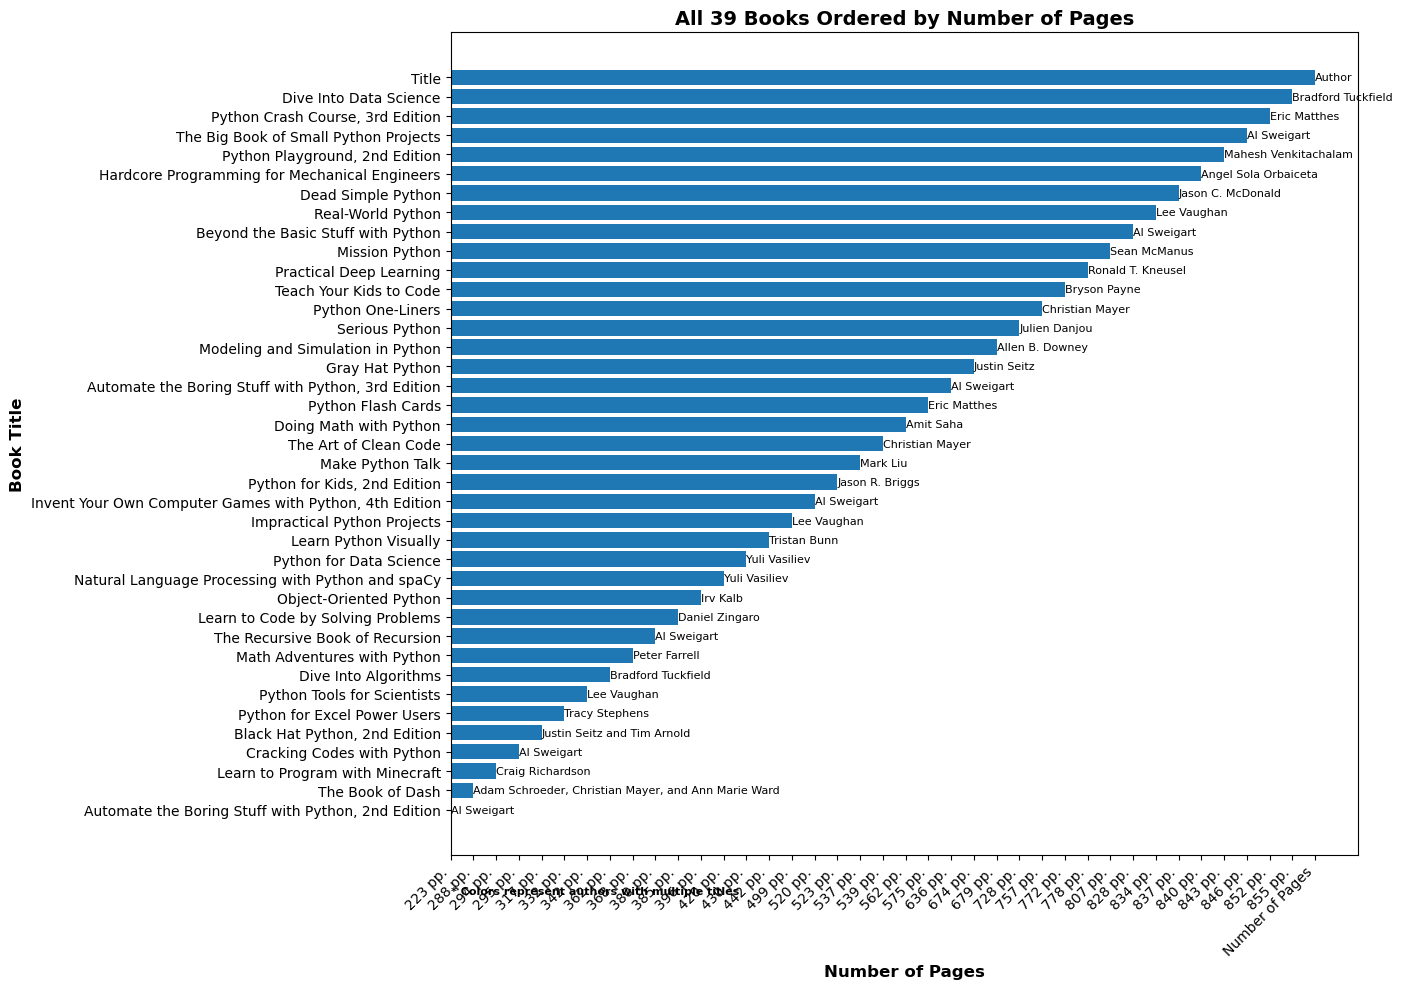

In [256]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(14, 10))

# Create the bar plot
bars = ax.barh(DF_PYTHON_BOOKS['Title'], DF_PYTHON_BOOKS['Number of Pages'])

# Customize the plot
ax.set_xlabel('Number of Pages', fontsize=12, fontweight='bold')
ax.set_ylabel('Book Title', fontsize=12, fontweight='bold')
ax.set_title('All 39 Books Ordered by Number of Pages', fontsize=14, fontweight='bold')

# Add author labels above each bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, i, f"{DF_PYTHON_BOOKS.iloc[i]['Author']}", 
            verticalalignment='center',
            horizontalalignment='left',
            fontsize=8)

# Add color legend for authors with multiple titles
multi_authors = []
for author in author_colors.values():
    if sum(1 for col in author_colors.values() if col == author) > 1:
        multi_authors.append(author)

if multi_authors:
    legend_patches = [
        patches.Rectangle((0, 0), 1, 1, fc=color, edgecolor="black")
        for color in multi_authors
    ]
   # ax.legend(legend_patches, [f"Author with multiple titles ({len(multi_authors)})"], 
             # loc='upper center', bbox_to_anchor=(0.5, -0.05),
            #  ncol=1, fancybox=True, shadow=True)

# Increase font size for x-axis labels
plt.xticks(fontsize=10, rotation=45, ha='right')

# Add comment about color coding
ax.text(0, -0.05, '* Colors represent authors with multiple titles', 
        fontsize=8, fontweight='bold',
        transform=ax.transAxes, va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()